In [44]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_pacf

In [45]:
# Load data and preprocess
data = pd.read_csv("adidas quarterly sales.csv")
data['Time Period'] = pd.to_datetime(data['Time Period'])
data.set_index('Time Period', inplace=True)

C:\Users\adhit\AppData\Local\Temp\ipykernel_2920\2912975739.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Time Period'] = pd.to_datetime(data['Time Period'])


In [46]:
# Exploratory Data Analysis
rolling_mean = data['Revenue'].rolling(window=4).mean()
rolling_std = data['Revenue'].rolling(window=4).std()

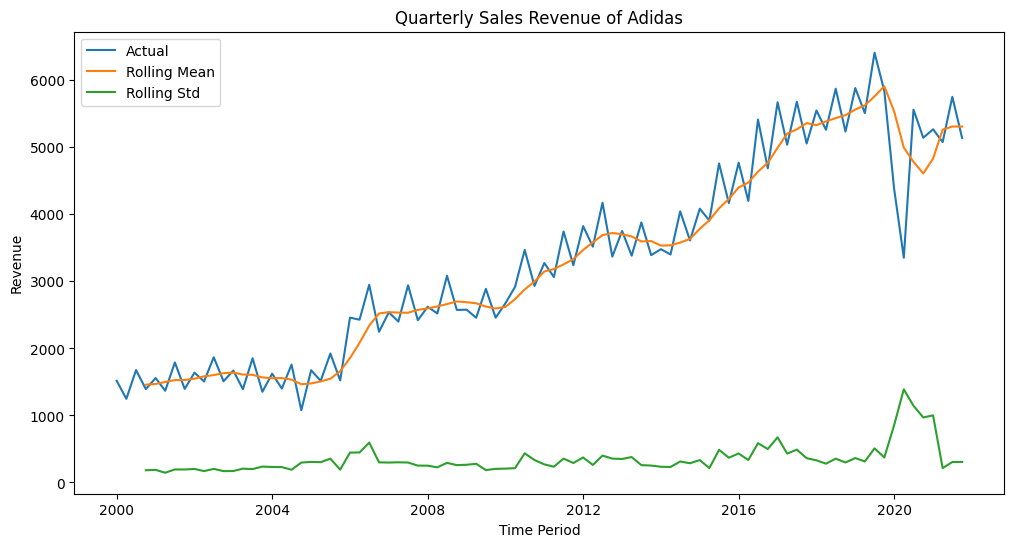

In [47]:
# Visualize rolling mean and standard deviation
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Revenue'], label='Actual')
plt.plot(rolling_mean.index, rolling_mean, label='Rolling Mean')
plt.plot(rolling_std.index, rolling_std, label='Rolling Std')
plt.xlabel('Time Period')
plt.ylabel('Revenue')
plt.title('Quarterly Sales Revenue of Adidas')
plt.legend()
plt.show()

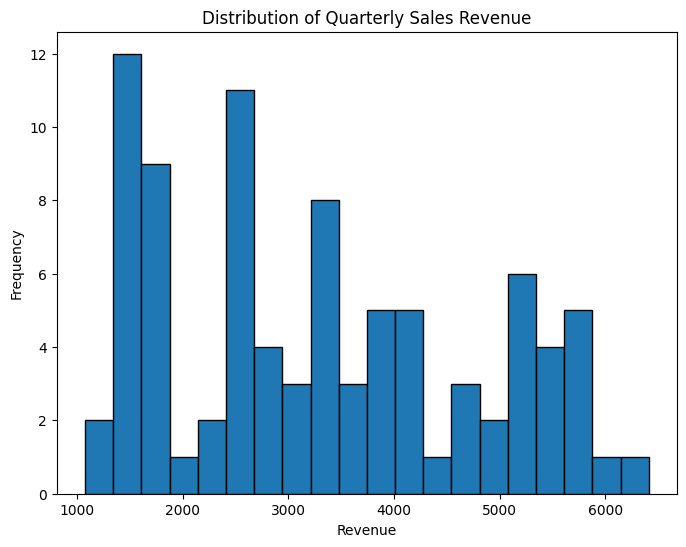

In [48]:
# Visualize revenue distribution
plt.figure(figsize=(8, 6))
plt.hist(data['Revenue'], bins=20, edgecolor='black')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Quarterly Sales Revenue')
plt.show()

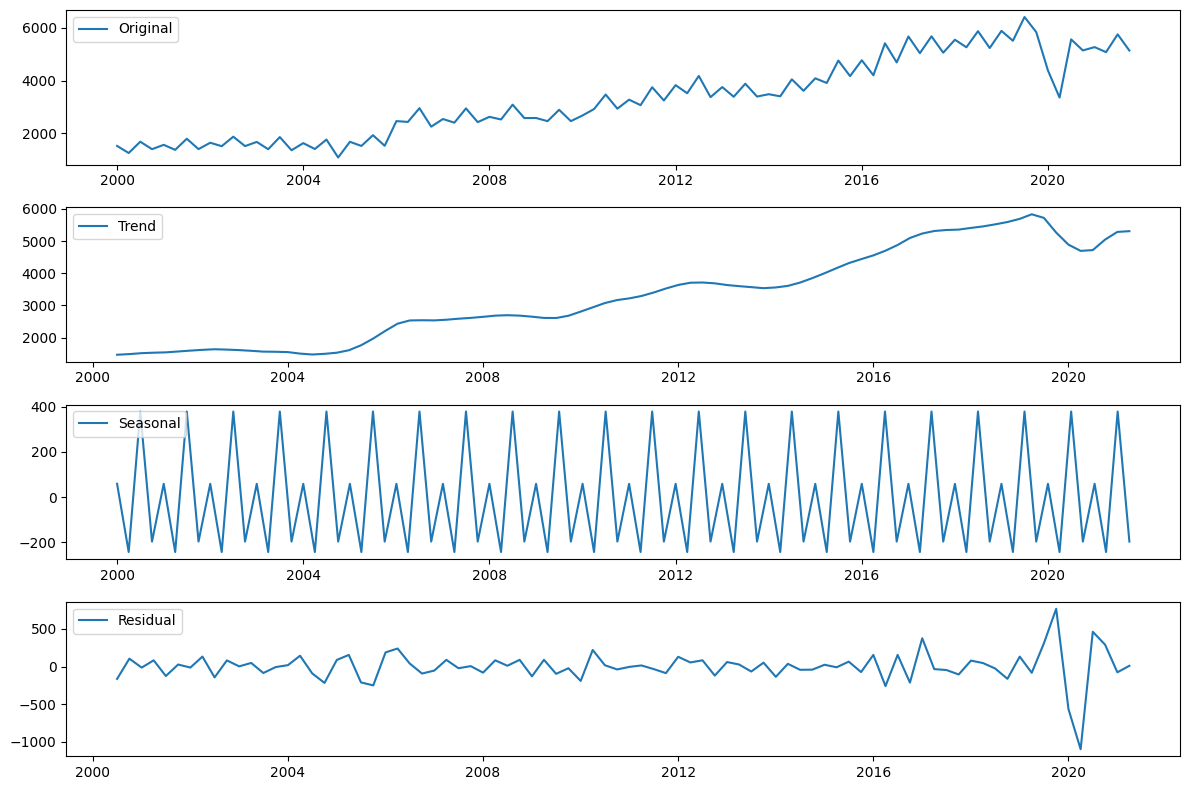

In [49]:
# Seasonal Decomposition
decomposition = seasonal_decompose(data['Revenue'], period=4)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(data['Revenue'], label='Original')
plt.legend()
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

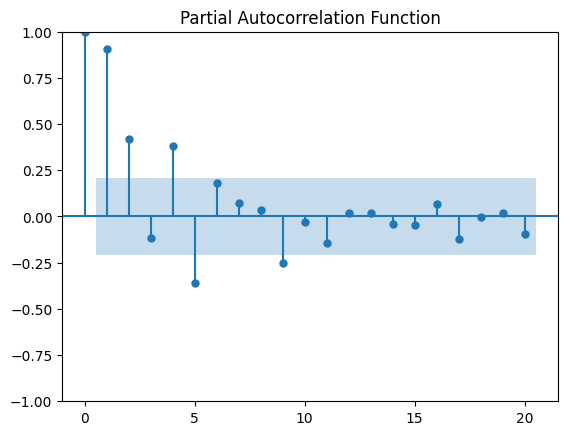

In [50]:
# ACF and PACF plots
plt.figure(figsize=(12, 6))
plot_pacf(data['Revenue'], lags=20)
plt.title('Partial Autocorrelation Function')
plt.show()

In [51]:
# Model Building and Evaluation
train_size = int(0.8 * len(data))
train, test = data[:train_size], data[train_size:]

p = 5
d = 1
q = 2

model=sm.tsa.statespace.SARIMAX(data['Revenue'],order=(p, d, q),seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\adhit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\adhit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency QS-OCT will be used.
  self._init_dates(dates, freq)
c:\Users\adhit\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                            Revenue   No. Observations:                   88
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -548.521
Date:                            Thu, 24 Aug 2023   AIC                           1127.041
Time:                                    13:45:04   BIC                           1161.803
Sample:                                01-01-2000   HQIC                          1140.921
                                     - 10-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.5794      0.386     -4.092      0.000      -2.336      -0.823
ar.L2         -1.4320      0.575   

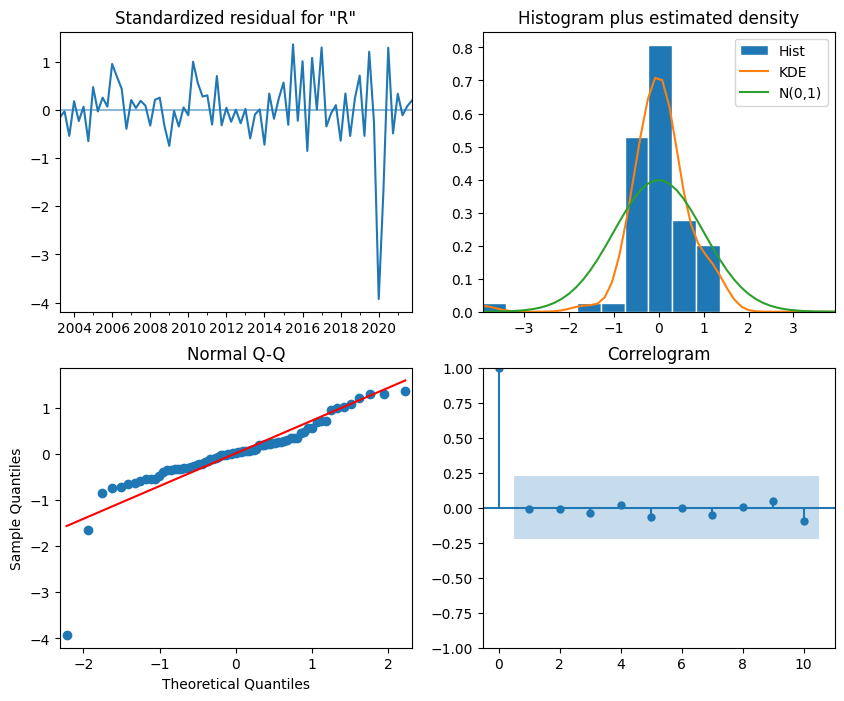

In [52]:
# Model diagnostics
model.plot_diagnostics(figsize=(10, 8))
plt.show()

In [53]:
# Forecasting and Visualization
forecast = model.get_forecast(steps=len(test))
forecast_index = pd.date_range(start=test.index.min(), periods=len(test))
forecast_mean = forecast.predicted_mean

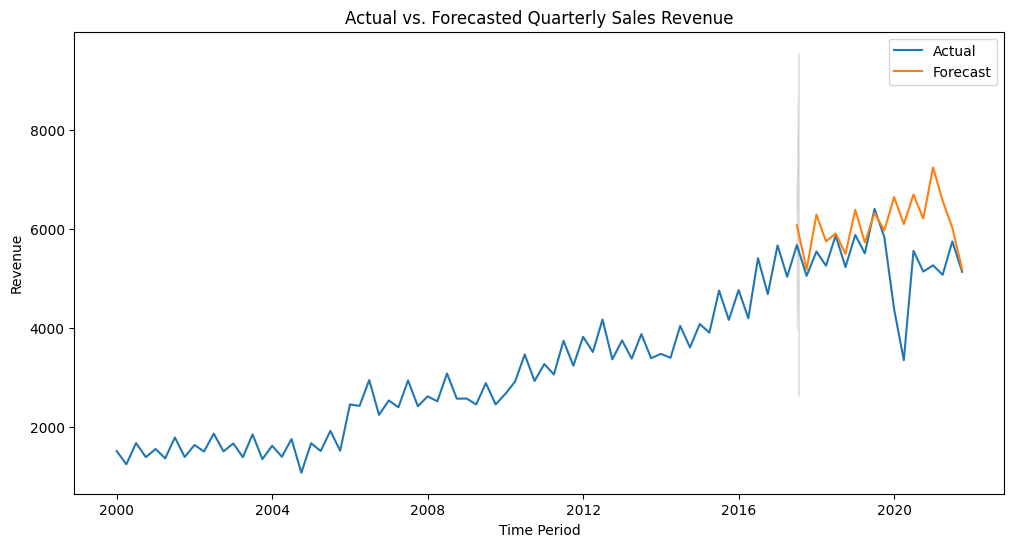

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Revenue'], label='Actual')
plt.plot(test.index, forecast_mean, label='Forecast')
plt.fill_between(forecast_index,forecast.conf_int().iloc[:, 0],forecast.conf_int().iloc[:, 1],color='gray', alpha=0.2)
plt.xlabel('Time Period')
plt.ylabel('Revenue')
plt.title('Actual vs. Forecasted Quarterly Sales Revenue')
plt.legend()
plt.show()

In [55]:
# Check for missing values in test['Revenue'] and forecast_mean
print("Missing values in test['Revenue']:", test['Revenue'].isnull().sum())
print("Missing values in forecast_mean:", forecast_mean.isnull().sum())

# Check if there are any infinite or extremely large values in forecast_mean
print("Infinite values in forecast_mean:", ~np.isfinite(forecast_mean).all())

# Ensure indices match between test['Revenue'] and forecast_mean
print("Indices match:", test.index.equals(forecast_mean.index))

Missing values in test['Revenue']: 0
Missing values in forecast_mean: 0
Infinite values in forecast_mean: False
Indices match: False
